In [2]:
import torch
import numpy as np 
import matplotlib.pyplot as plt 
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms,utils
from torchvision.datasets import ImageFolder
import warnings 
import glob
import time

from PIL import Image
import torchvision.transforms as T

In [13]:
dino = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14')
dino = dino.cuda().float()

Using cache found in /home/krishan/.cache/torch/hub/facebookresearch_dinov2_main
/home/krishan/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/krishan/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/krishan/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


In [35]:
image_transforms = T.Compose([
    T.Resize(520, interpolation=T.InterpolationMode.BICUBIC),
    T.CenterCrop(518),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])


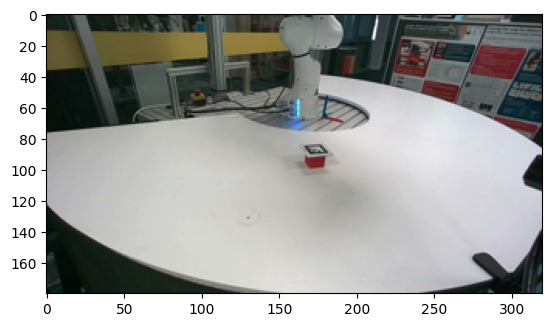

In [40]:
path = "/home/krishan/work/2024/datasets/franka_3D_reacher/episodes/1/images/front/1.png"


img = Image.open(path).convert("RGB")

# show image
plt.imshow(img)
plt.show()

img = image_transforms(img)
img = img.unsqueeze(0)
img = img.cuda().float()
emb = dino.forward_features(img)['x_norm_patchtokens'].detach().cpu().numpy()



In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

patch_size = dino.patch_size # patchsize=14
feat_dim = 1024 # vitl14
patch_h  = 520//patch_size
patch_w  = 520//patch_size

# First PCA to Seperate Background
# sklearn expects 2d array for traning
total_features = emb.reshape(1 * patch_h * patch_w, feat_dim) #4(*H*w, 1024)

pca = PCA(n_components=3)
pca.fit(total_features)
pca_features = pca.transform(total_features)

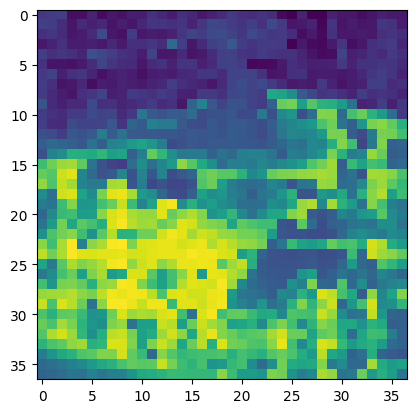

In [39]:

# min_max scale
pca_features[:, 0] = (pca_features[:, 0] - pca_features[:, 0].min()) / \
                     (pca_features[:, 0].max() - pca_features[:, 0].min())
#pca_features = sklearn.processing.minmax_scale(pca_features)

plt.imshow(pca_features[0:patch_h*patch_w, 0].reshape(patch_h, patch_w))

plt.show()